# Ejercicios

## Operaciones comunes

**Producto por escalar a un vector**

Si $v = \left [ \begin{array}{c}
4 \\
7 \\
-2
\end{array}
\right ]$ realizar: $3.5v$.

**Suma de vectores**

Si $a =  \left [ \begin{array}{c}
3 \\
4 \\
1 \\
-1
\end{array}
\right ], b =  \left [ \begin{array}{c}
3 \\
-5 \\
0 \\
1
\end{array}
\right ]$ realizar: $a+b$.

**Producto punto entre vectores**

Si $a = \left [ \begin{array}{c}
1 \\
-1 \\
2
\end{array}
\right ]$ y $b = \left [ \begin{array}{c}
10 \\
-4 \\
3
\end{array}
\right ]$ realizar: $a \cdot b = a^Tb$.

**Operaciones con matrices**

1) Si $A =  \left [ \begin{array}{cc}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{array}
\right ]$, $x = \left [ \begin{array}{c}
x_1 \\
x_2 \\
x_3
\end{array}
\right ]$ realizar Ax.

2) Si $A =\left [ \begin{array}{cc}
3 & 1 \\
2 & 6 \\
4 & 0
\end{array}
\right ]$, $x =  \left [ \begin{array}{c}
-\pi \\
2
\end{array}
\right ]$ realizar $Ax$.

3) Si $A=  \left [ \begin{array}{cc}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
\end{array}
\right ]$, $B =  \left [ \begin{array}{cc}
b_{11} & b_{12}\\
b_{21} & b_{22} \\
\end{array}
\right ]$ realizar: $A + B$, $AB$, $BA$, $A^T$.

## Sistemas de ecuaciones lineales

**1) Resolver:**


$$ 
\begin{array}{l}
\left [
\begin{array}{ccc}
2 & \pi & 1\\
0 & 0 & \sqrt{2} \\
0 & 6 & 6
\end{array}
\right ]
\left [
\begin{array}{c}
x_1 \\
x_2 \\
x_3
\end{array}
\right ]
=
\left [
\begin{array}{c}
0 \\
0 \\
0
\end{array}
\right ]
\end{array}
$$

**2) El sistema:**



$$
\begin{array}{l}
Ax=\left [
\begin{array}{cc}
1 & -3 \\
-2 & 6
\end{array}
\right ]
\left [
\begin{array}{c}
x_1 \\
x_2
\end{array}
\right ]
=
\left [
\begin{array}{c}
-1 \\
2
\end{array}
\right ]
=b
\end{array}
$$

**tiene infinitas soluciones, su conjunto solución está dado por:**

$$S = 
\left \{
\left [ 
\begin{array}{c}
-1 + 3t \\
t\\
\end{array}
\right ] | t \in \mathbb{R}
\right \}
=
\left \{
\left [ 
\begin{array}{c}
-1\\
0\\
\end{array} 
\right ]
+ 
t\left [
\begin{array}{c}
3\\
1\\
\end{array}
\right ] | t \in \mathbb{R}
\right \}
$$

**Verificamos lo anterior con *SymPy*:**

In [1]:
import sympy

In [2]:
x_vars = sympy.symbols("x1, x2")

In [3]:
A = sympy.Matrix([[1, -3],
                  [-2, 6]])

In [4]:
x = sympy.Matrix(x_vars)

In [5]:
b = sympy.Matrix([-1, 2])

In [6]:
sympy.solve(A*x - b, x_vars)

{x1: 3*x2 - 1}

**Hacemos la gráfica con *NumPy* y *matplotlib*:**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
A = np.array([[1, -3],
              [-2, 6.0]])

In [9]:
b = np.array([-1,2.0])

**Ejemplo de soluciones:**

In [10]:
point1 = [-1, 0]
point2 = [0, 1/3]
point3 = [(point2[0]+point1[0])/2, 
           (point2[1] + point1[1])/2]

In [11]:
A@point1

array([-1.,  2.])

In [12]:
A@point2

array([-1.,  2.])

In [13]:
A@point3

array([-1.,  2.])

**Podemos dar la solución y graficar la solución del sistema anterior que tiene mínima norma 2 o Euclidiana $||x||_2 = \sqrt{x_1^2 + x_2^2}$ utilizando [NumPy](https://numpy.org/)**

**Solución que tiene mínima norma $2$ o Euclidiana con [pinv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html):**

In [14]:
np.linalg.pinv(A)@b
point4 = np.row_stack((np.zeros(2), np.linalg.pinv(A)@b))
point4[1,:]

array([-0.1,  0.3])

In [15]:
A@point4[1,:]

array([-1.,  2.])

**El siguiente punto satisface al sistema homogéneo:**

In [16]:
point_homogeneous_system = [3, 1]

In [17]:
A@point_homogeneous_system

array([0., 0.])

**Gráfica:**

In [18]:
t = np.linspace(-1,1,100)

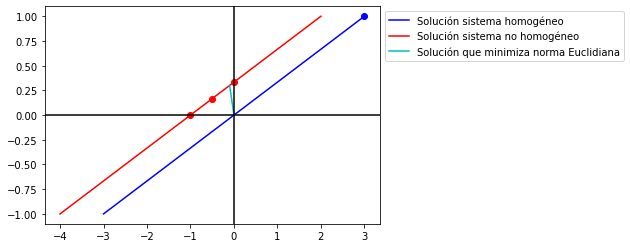

In [19]:
plt.plot(3*t, t, 'b')
plt.plot(-1+3*t, t, 'r')
plt.scatter(point_homogeneous_system[0], point_homogeneous_system[1], color='b')
plt.scatter(point1[0], point1[1], color = 'r')
plt.scatter(point2[0], point2[1], color='r')
plt.scatter(point3[0], point3[1], color = 'r')
plt.plot(point4[:,0], point4[:,1], color='c')
plt.axhline(color='k')
plt.axvline(color='k')
plt.legend(["Solución sistema homogéneo",
            "Solución sistema no homogéneo",
            "Solución que minimiza norma Euclidiana"], 
            bbox_to_anchor=(1, 1))
plt.show()

In [20]:
np.linalg.norm(point1)

1.0

In [21]:
np.linalg.norm(point2)

0.3333333333333333

In [22]:
np.linalg.norm(point3)

0.5270462766947299

In [23]:
np.linalg.norm(point4[1,:])

0.316227766016838

**El vector que tiene mínima norma $2$ es:**

In [24]:
point4[1,:]

array([-0.1,  0.3])

3)**El sistema:**

$$
\begin{eqnarray}
x-y+0z &=& 0 \nonumber \\
\end{eqnarray}
$$

**tiene infinitas soluciones dadas por el conjunto solución:**

$$S = 
\left \{
\left [ 
\begin{array}{c}
t_1 \\
t_1\\
t_2\\
\end{array}
\right ]
| t_1,t_2 \in \mathbb{R}
\right \}
=
\left \{
\left [ 
\begin{array}{c}
0 \\
0\\
t_2\\
\end{array}
\right ] +  
\left [ 
\begin{array}{c}
t_1 \\
t_1\\
0\\
\end{array}
\right ]
| t_1,t_2 \in \mathbb{R}
\right \}
$$

**Verificamos lo anterior con *SymPy*:**

In [31]:
x_vars = sympy.symbols("x, y, z")
x = sympy.Matrix(x_vars)
A = sympy.Matrix([[1, -1, 0]])
b = sympy.Matrix([0])

In [32]:
sympy.solve(A*x-b, x_vars)

{x: y}

In [37]:
t1, t2 = np.meshgrid(np.linspace(-5,5,100), np.linspace(-5,5,100))

In [38]:
z = -1
y = 1
point1 = (y,y,z)

In [39]:
point1

(1, 1, -1)

In [40]:
z=2
y=-3
point2 = (y,y,z)

In [41]:
point2

(-3, -3, 2)

In [42]:
z=4
y=5
point3 = (y,y,z)

In [43]:
point3

(5, 5, 4)

**Los puntos anteriores satisfacen la ecuación:**

In [44]:
A = np.array([[1, -1, 0]])

In [45]:
A

array([[ 1, -1,  0]])

In [46]:
A@point1

array([0])

In [47]:
A@point2

array([0])

In [48]:
A@point3

array([0])

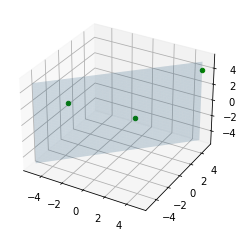

In [49]:
# Create the figure
fig = plt.figure()
# Add an axes
ax = fig.gca(projection='3d')
ax.plot_surface(t1, t1, t2, alpha=0.2)
ax.scatter(point1[0], point1[1], point1[2], color='green')
ax.scatter(point2[0], point2[1], point2[2], color='green')
ax.scatter(point3[0], point3[1], point3[2], color='green')
plt.show()

**¿Solución del sistema anterior que tiene menor norma $2$ o Euclidiana?**